# take some parts from here and advanced_DSL.py

# DSL test @advanced_DSL.py


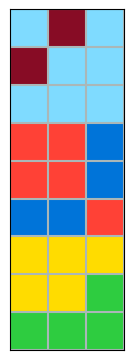

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import glob
from pathlib import Path

from basics.ARCLOADER import *
from basics.VISUALIZATION import *

from DSL.dsl import *
from DSL.dsl2 import *
from DSL.advanced_DSL import *
from DSL.hodel_utils import *

# from KG_definition.node import *
# from KG_definition.new import *
# from KG_definition.edge import *

# from KG_construction.construction import *

arc = ARCDataset()
tasks, j_codes = arc.load_data(type = 'train', form = 'list_in_list', shuffle = False, jcode = True)

x = 24    # 0 - 399      (task number)
x = arc.jtoi('662c240a', j_codes)
tt = 0    # 0 or 1       (train or test)
p = 0     # 0 - max pair (pair number)
io = 0   # 0 or 1       (input or output)

# example_task = tasks[x]
# example_pair = tasks[x][tt][p]
example_grid = tasks[x][tt][p][io]

plot_data(example_grid)
# plot_data(example_task)
# plot_data(find_all_objects_sort_grid(example_grid), keyword = "objects")



[(8, (0, 0))]
[(9, (0, 1))]
[(9, (1, 0))]
[(2, (5, 2))]
[(9, (0, 1)), (9, (1, 0))]
[(1, (3, 2)), (1, (4, 2))]
[(1, (5, 0)), (1, (5, 1))]
[(2, (3, 0)), (2, (3, 1)), (2, (4, 0)), (2, (4, 1))]
[(1, (3, 2)), (1, (4, 2)), (1, (5, 0)), (1, (5, 1))]
[(3, (7, 2)), (3, (8, 0)), (3, (8, 1)), (3, (8, 2))]
[(2, (3, 0)), (2, (3, 1)), (2, (4, 0)), (2, (4, 1)), (2, (5, 2))]
[(4, (6, 0)), (4, (6, 1)), (4, (6, 2)), (4, (7, 0)), (4, (7, 1))]
[(8, (0, 2)), (8, (1, 1)), (8, (1, 2)), (8, (2, 0)), (8, (2, 1)), (8, (2, 2))]
[(8, (0, 0)), (8, (0, 2)), (8, (1, 1)), (8, (1, 2)), (8, (2, 0)), (8, (2, 1)), (8, (2, 2))]
[(2, (3, 0)), (2, (3, 1)), (1, (3, 2)), (2, (4, 0)), (2, (4, 1)), (1, (4, 2)), (1, (5, 0)), (1, (5, 1)), (2, (5, 2)), (4, (6, 0)), (4, (6, 1)), (4, (6, 2)), (4, (7, 0)), (4, (7, 1)), (3, (7, 2)), (3, (8, 0)), (3, (8, 1)), (3, (8, 2))]
[(8, (0, 0)), (9, (0, 1)), (8, (0, 2)), (9, (1, 0)), (8, (1, 1)), (8, (1, 2)), (8, (2, 0)), (8, (2, 1)), (8, (2, 2)), (2, (3, 0)), (2, (3, 1)), (1, (3, 2)), (2, (4, 0

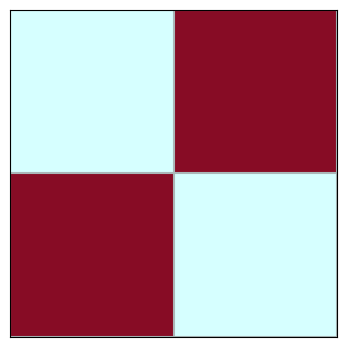

In [15]:
objs_colcoord = find_all_objects_sort(example_grid)
objs_grid = find_all_objects_sort_grid(example_grid)

forprint(objs_colcoord)
forprint(objs_grid)

plot_data(objs_grid[4])


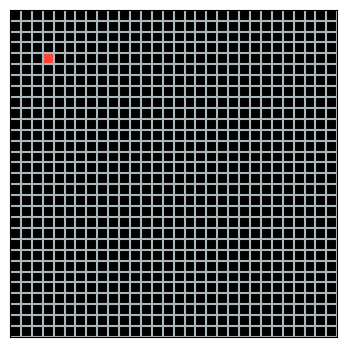

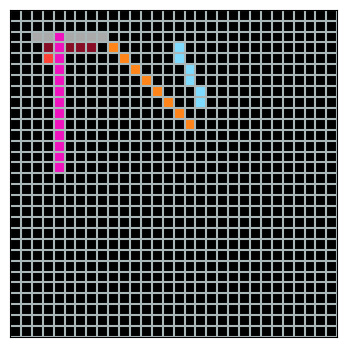

In [16]:
result = make_grid(30, 30, 0)
result = paste_object(result, objs_grid[3], 4, 3)
plot_data(result)

# result = cut_grid(result, 2, 2, 5, 9)
# plot_data(result)

result = make_line(result, 2, 2, 2, 8, 5, include_ends = True)
result = make_line(result, 3, 2, 3, 8, 9, include_ends = False)
result = make_line(result, 2, 4, 14, 4, 6, include_ends = True)
result = make_line(result, 3, 9, 10, 16, 7, include_ends = True)
result = make_line(result, 9, 18, 2, 14, 8, include_ends = False)
plot_data(result)

# result = cut_grid(result, 2, 2, 5, 9)
# plot_data(result)

# plot_data(find_all_objects_sort_grid(result), keyword = "objects")




## with nodes

In [17]:
# from components.components import *

# arc = ARCDataset()
# tasks, j_codes = arc.load_data(type = 'train', form = 'list_in_list', shuffle = False, jcode = True)

# x = 22    # 0 - 399      (task number)
# x = arc.jtoi('97a05b5b', j_codes)
# tt = 0    # 0 or 1       (train or test)
# p = 0     # 0 - max pair (pair number)
# io = 0   # 0 or 1       (input or output)

# # example_task = tasks[x]
# # example_pair = tasks[x][tt][p]
# example_grid = tasks[x][tt][p][io]

# # plot_data(example_grid)
# plot_data(find_all_objects_sort_grid(example_grid), keyword = "objects")

# # task
# node_list = []

# task = Task(tasks[x])
# node_list.append(task)

# # pair
# for p in range(task.num_of_ex + task.num_of_test):
#     if p < task.num_of_ex:
#         tt = 0
#         p = p
#         pair = Pair(task, tt, p)
#     else:
#         tt = 1
#         p = p - task.num_of_ex
#         pair = Pair(task, tt, p)
#     node_list.append(pair)

#     # grid
#     for io in range(2):
#         grid = Grid(pair, tt, p, io)
#         node_list.append(grid)

#         # pixel
#         for row in range(grid.height):
#             for col in range(grid.width):
#                 pixel = Pixel(grid, row, col)
#                 node_list.append(pixel)

#         # object
#         for o in range(len(find_all_objects(grid.grid))):
#             object = Object(grid, o, find_all_objects(grid.grid)[o])
#             node_list.append(object)

# # forprint(node_list)
# for node in node_list:
#     print(node.type, node)
# # print(node_list[-3].size)

IndexError: string index out of range